In [ ]:
# Decission Trees

In [1]:
# Create the directory
import os
print(os.getcwd())

# Set the working directory
os.chdir('/Users/surajgurung/Library/CloudStorage/OneDrive-UniversityofFlorida/AI&FINtech/CreditApplication')

# list the name of variables located their
print(os.listdir())

/Users/surajgurung/Library/CloudStorage/OneDrive-UniversityofFlorida/AI&FINtech/CreditApplication
['.DS_Store', 'anaconda_projects', 'LendingClub_Decision_Trees_Training_Set.xlsx', 'Logistic_Regression.ipynb', '.ipynb_checkpoints', 'Decision_trees.ipynb', '.git', 'LendingClub_Decision_Trees_Test_Set.xlsx', 'LendingClub_Decision_Trees_Validation_Set.xlsx']


In [3]:
## Upload the library
# The Libraries                                                                                # Version
import pandas as pd                                                                            # 1.3.4
import numpy as np                                                                             # 1.20.3
import scipy.stats as stats                                                                    # 0.12.2
from sklearn.linear_model import LogisticRegression                                            # 0.24.2
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from IPython.display import Image 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score 
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt                                                                # 3.4.3

In [5]:
# Load the dataset
train = pd.read_excel('/Users/surajgurung/Library/CloudStorage/OneDrive-UniversityofFlorida/AI&FINtech/CreditApplication/LendingClub_Decision_Trees_Training_Set.xlsx')
validation=pd.read_excel('/Users/surajgurung/Library/CloudStorage/OneDrive-UniversityofFlorida/AI&FINtech/CreditApplication/LendingClub_Decision_Trees_Validation_Set.xlsx')
test = pd.read_excel('/Users/surajgurung/Library/CloudStorage/OneDrive-UniversityofFlorida/AI&FINtech/CreditApplication/LendingClub_Decision_Trees_Test_Set.xlsx')

In [7]:
# 1 = good, 0 = default
print(train.head())
print("----------------------")
print(validation.head())
print("----------------------")# remove target column to create feature only dataset
X_train = train.drop('loan_status',axis=1)
X_val=validation.drop('loan_status',axis=1)
X_test=test.drop('loan_status',axis=1)

# store target column
y_train = train['loan_status']
y_val=validation['loan_status']
y_test=test['loan_status']

print(X_train.shape, y_train.shape, X_val.shape,y_val.shape,X_test.shape,y_test.shape)

   home_ownership    income    dti  fico  loan_status
0               1   44304.0  18.47   690            0
1               0   50000.0  29.62   735            1
2               0   64400.0  16.68   675            1
3               0   38500.0  33.73   660            0
4               1  118000.0  26.66   665            1
----------------------
   home_ownership    income    dti  fico  loan_status
0               0   25000.0  27.60   660            0
1               0   50000.0  21.51   715            1
2               1  100000.0   8.14   770            1
3               0   75000.0   1.76   685            0
4               1   78000.0  16.11   680            1
----------------------


In [9]:
# remove target column to create feature only dataset
X_train = train.drop('loan_status',axis=1)
X_val=validation.drop('loan_status',axis=1)
X_test=test.drop('loan_status',axis=1)

# store target column
y_train = train['loan_status']
y_val=validation['loan_status']
y_test=test['loan_status']

print(X_train.shape, y_train.shape, X_val.shape,y_val.shape,X_test.shape,y_test.shape)

(7000, 4) (7000,) (3000, 4) (3000,) (2290, 4) (2290,)


In [11]:
# Scale features based on Z-Score
scaler = StandardScaler()
scaler.fit(X_train)

X_scaled_train = scaler.transform(X_train)
X_scaled_vals = scaler.transform(X_val)
X_scaled_test = scaler.transform(X_test)

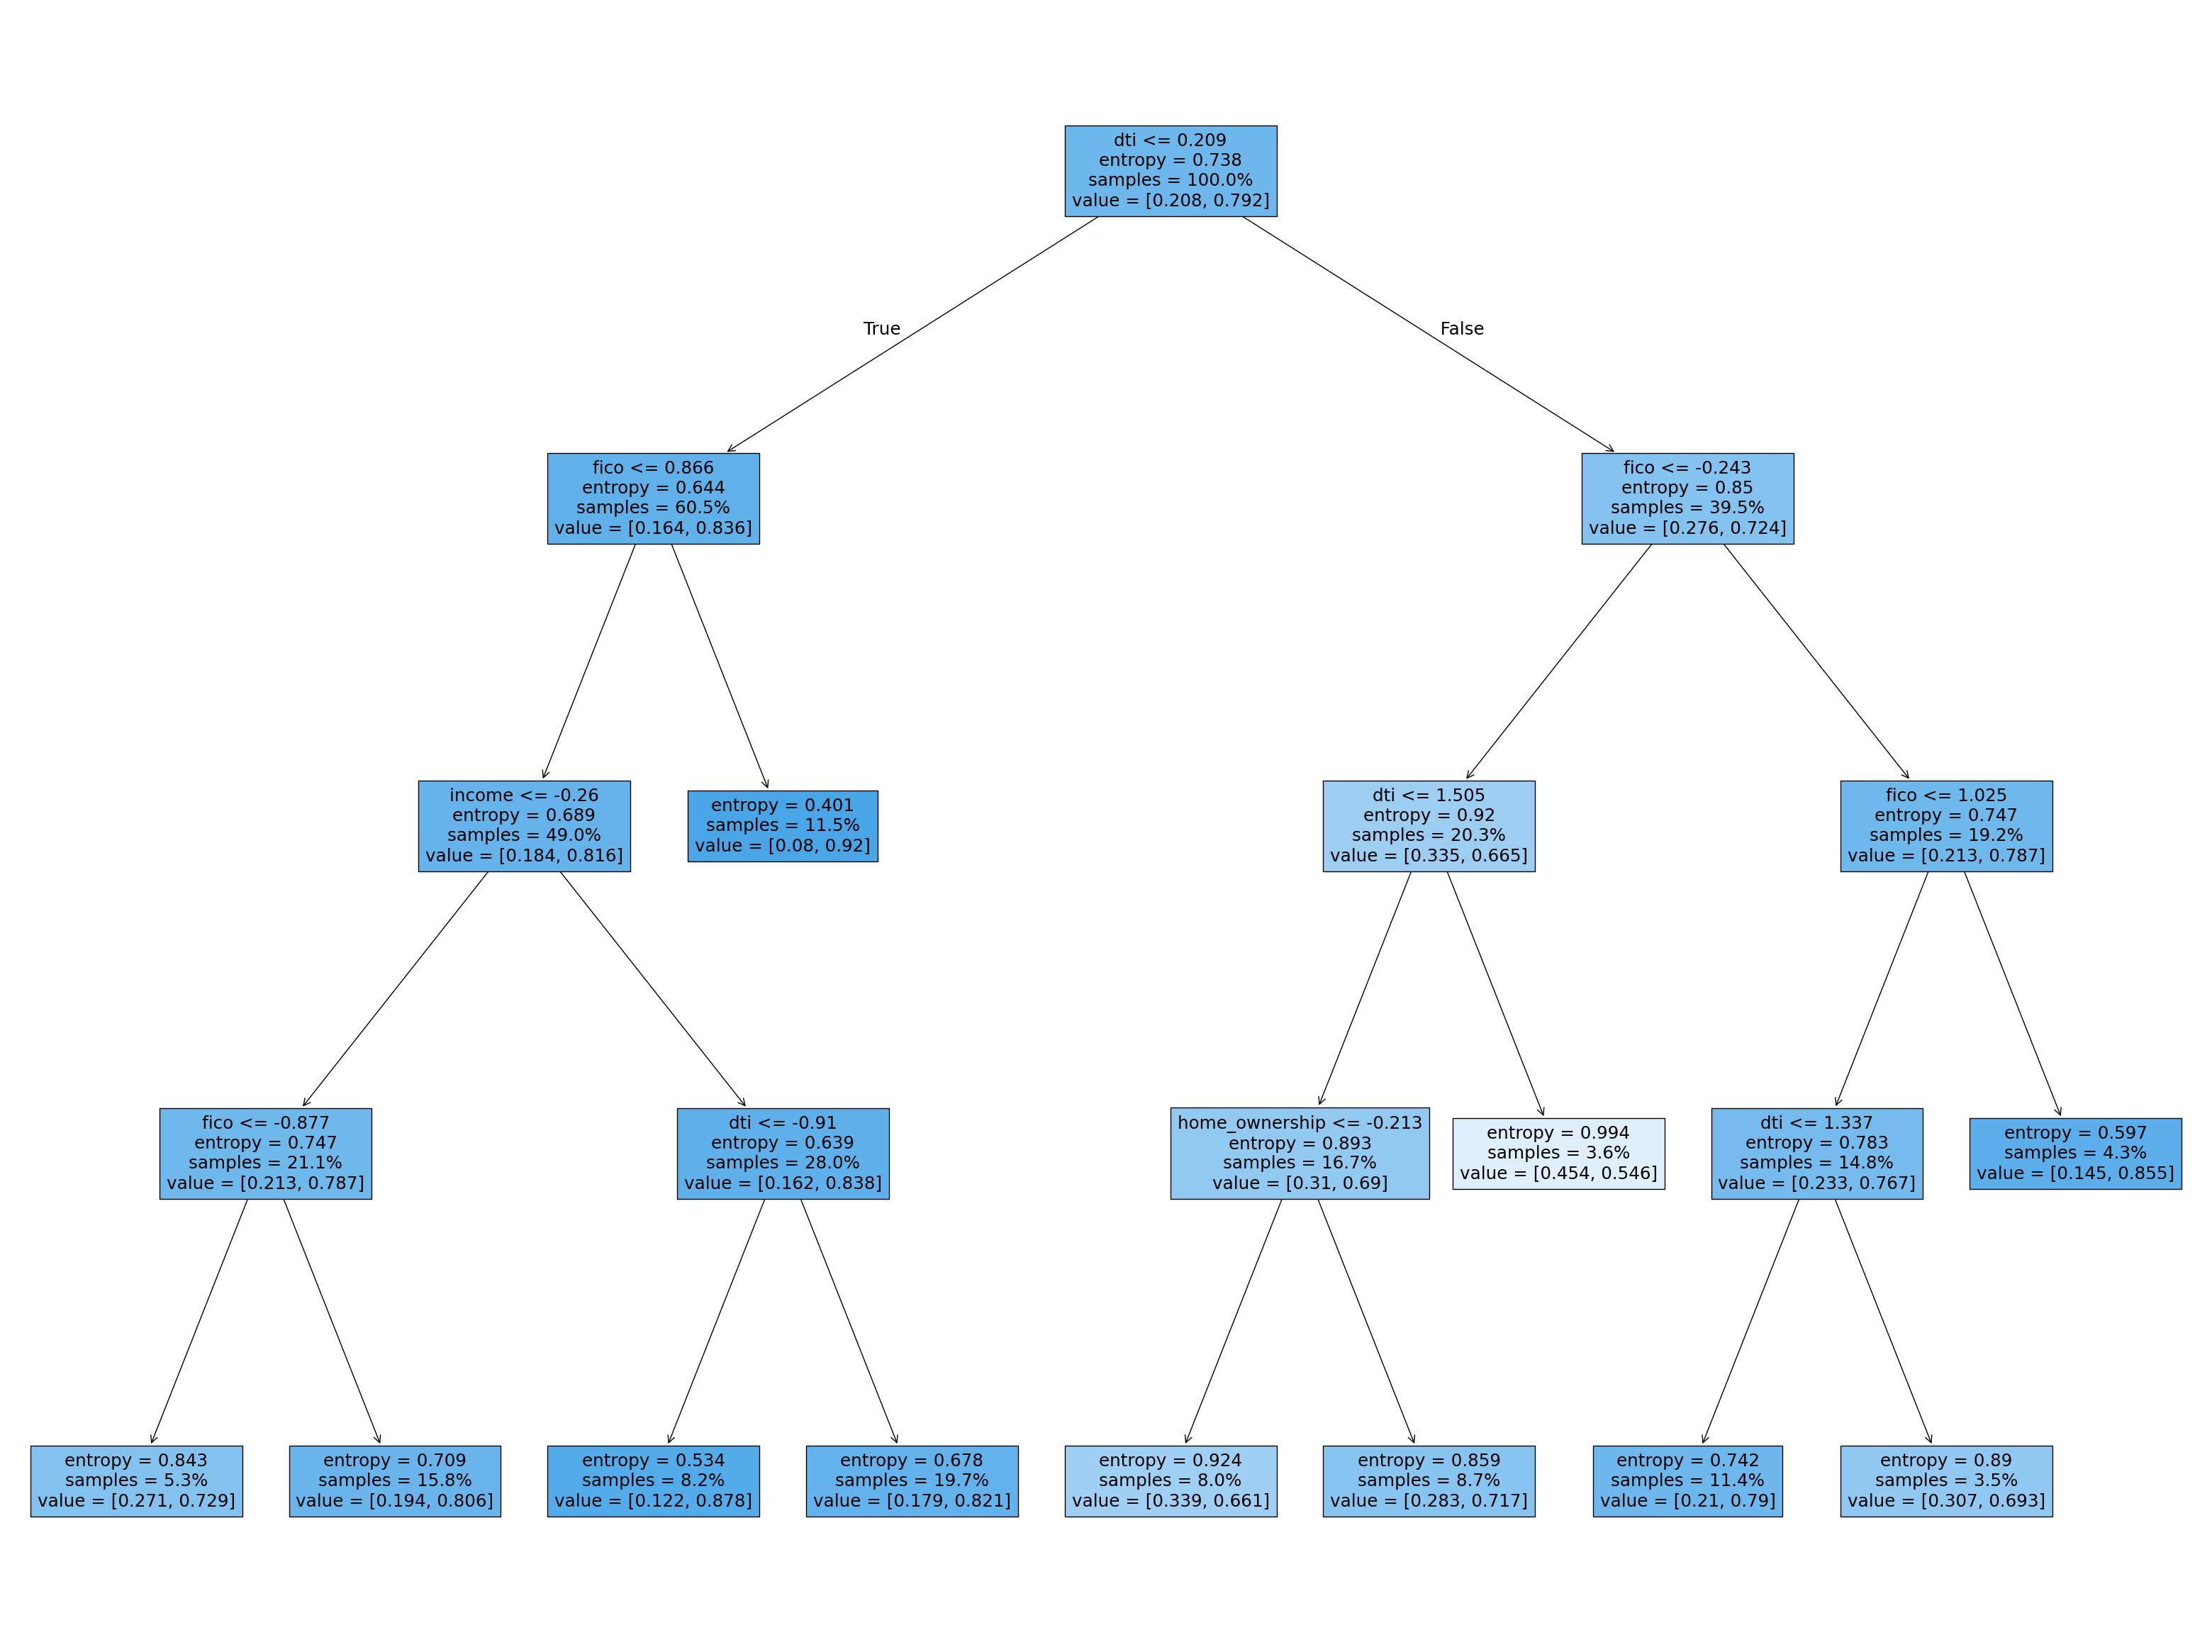

In [13]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=1000,min_samples_leaf=200,random_state=0)
clf = clf.fit(X_scaled_train,y_train)
fig, ax = plt.subplots(figsize=(40, 30))
plot_tree(clf, filled=True, feature_names=X_train.columns, proportion=True)
plt.show()

In [15]:
y_train_pred = clf.predict_proba(X_scaled_train)
y_val_pred=clf.predict_proba(X_scaled_vals)
y_test_pred=clf.predict_proba(X_scaled_test)

In [17]:
print (y_train_pred)

[[0.19366516 0.80633484]
 [0.14473684 0.85526316]
 [0.1788559  0.8211441 ]
 ...
 [0.1788559  0.8211441 ]
 [0.30737705 0.69262295]
 [0.19366516 0.80633484]]


In [19]:
THRESHOLD = [.75, .80, .85]
results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "true pos rate", "true neg rate", "false pos rate", "precision", "f-score"]) # df to store results
results['THRESHOLD'] = THRESHOLD                                                                           # threshold column
n_test = len(y_test)
Q = clf.predict_proba(X_scaled_test)[:,1]

In [21]:
j = 0                                                                                                      
for i in THRESHOLD:                                                                                        # iterate over each threshold        
                                                                         # fit data to model
    preds = np.where(Q>i, 1, 0)                                       # if prob > threshold, predict 1
    
    cm = (confusion_matrix(y_test, preds,labels=[1, 0], sample_weight=None)/n_test)*100 
    # confusion matrix (in percentage)
    
    print('Confusion matrix for threshold =',i)
    print(cm)
    print(' ')      
    
    TP = cm[0][0]                                                                                          # True Positives
    FN = cm[0][1]                                                                                          # False Positives
    FP = cm[1][0]                                                                                          # True Negatives
    TN = cm[1][1]                                                                                          # False Negatives
        
    results.iloc[j,1] = accuracy_score(y_test, preds) 
    results.iloc[j,2] = recall_score(y_test, preds)
    results.iloc[j,3] = TN/(FP+TN)                                                                         # True negative rate
    results.iloc[j,4] = FP/(FP+TN)                                                                         # False positive rate
    results.iloc[j,5] = precision_score(y_test, preds)
    results.iloc[j,6] = f1_score(y_test, preds)
   
    j += 1

Confusion matrix for threshold = 0.75
[[60.52401747 18.64628821]
 [12.31441048  8.51528384]]
 
Confusion matrix for threshold = 0.8
[[51.48471616 27.68558952]
 [10.13100437 10.69868996]]
 
Confusion matrix for threshold = 0.85
[[22.40174672 56.76855895]
 [ 2.79475983 18.0349345 ]]
 


In [23]:
print('ALL METRICS')
print(results.T.to_string(header=False))

ALL METRICS
THRESHOLD           0.75       0.8      0.85
accuracy        0.690393  0.621834  0.404367
true pos rate   0.764479  0.650303  0.282956
true neg rate   0.408805  0.513627  0.865828
false pos rate  0.591195  0.486373  0.134172
precision       0.830935  0.835578  0.889081
f-score         0.796323   0.73139  0.429289


In [25]:
# Compute the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, Q)
roc_auc = auc(fpr,tpr)

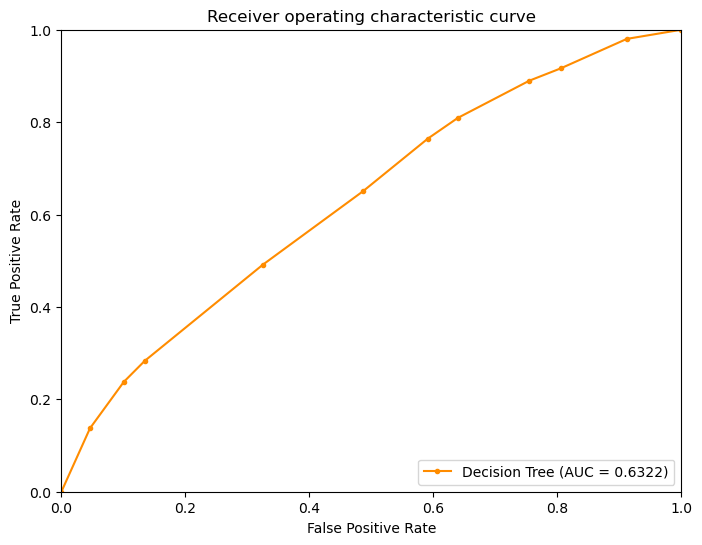

In [27]:
plt.figure(figsize=(8,6))      # format the plot size
lw = 1.5
plt.plot(fpr, tpr, color='darkorange', marker='.',
         lw=lw, label='Decision Tree (AUC = %0.4f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()